In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar extensión de Kedro
%load_ext kedro.ipython

# Cargar datasets
movies_metadata = catalog.load("movies_metadata")
print("Shape:", movies_metadata.shape)
print("Columnas:", movies_metadata.columns.tolist())


The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


[10/27/25 21:16:28] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=885926;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=329797;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Shape: (45466, 24)
Columnas: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']


preparacion de variables

[10/27/25 21:19:56] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=761098;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=206349;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Árbol de Decisión: vote_count ~ revenue + budget + popularity + runtime + vote_average + status
Mean Squared Error (MSE): 70217.4364
Mean Absolute Error (MAE): 59.2487
Root Mean Squared Error (RMSE): 264.9857
R² Score: 0.7390

Importancia de las variables:
  revenue: 0.7314
  budget: 0.0071
  popularity: 0.1827
  runtime: 0.0013
  vote_average: 0.0775
  In Production: 0.0000
  Planned: 0.0000
  Post Production: 0.0000
  Released: 0.0000
  Rumored: 0.0000


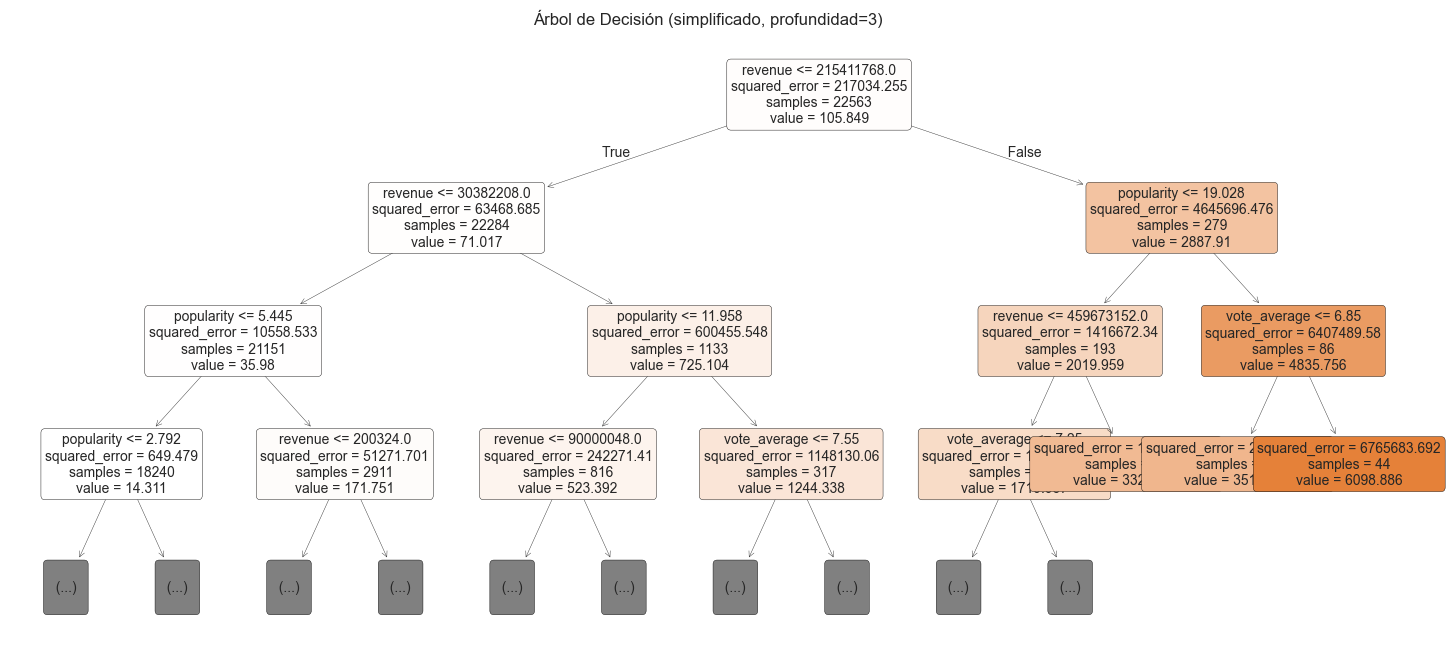

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Cargar dataset
movies_metadata = catalog.load("movies_metadata")

# Convertir columnas numéricas
numeric_cols = ['revenue', 'budget', 'popularity', 'runtime', 'vote_average', 'vote_count']
for c in numeric_cols:
    movies_metadata[c] = pd.to_numeric(movies_metadata[c], errors='coerce')

# Eliminar filas con nulos
movies_metadata = movies_metadata.dropna(subset=numeric_cols + ['status'])

# Convertir 'status' en variables dummy
status_dummies = pd.get_dummies(movies_metadata['status'], drop_first=True)

# Variables predictoras
X = movies_metadata[['revenue', 'budget', 'popularity', 'runtime', 'vote_average']]
X = pd.concat([X, status_dummies], axis=1)

# Variable objetivo
y = movies_metadata['vote_count']

# Dividir en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Crear y entrenar el modelo de Decision Tree
model = DecisionTreeRegressor(
    max_depth=7,           # Puedes ajustar para controlar overfitting
    min_samples_split=50,
    min_samples_leaf=10,
    random_state=42
)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print(f"Árbol de Decisión: vote_count ~ revenue + budget + popularity + runtime + vote_average + status")
print("="*50)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print("="*50)

# Importancia de variables
feature_names = X.columns
importances = model.feature_importances_
print("\nImportancia de las variables:")
for i, imp in enumerate(importances):
    print(f"  {feature_names[i]}: {imp:.4f}")

# Visualizar árbol (profundidad limitada para claridad)
plt.figure(figsize=(18, 8))
plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    max_depth=3,  # Limitar para no saturar el gráfico
    fontsize=10,
    rounded=True
)
plt.title("Árbol de Decisión (simplificado, profundidad=3)")
plt.show()


Conclusiones

Resultados Obtenidos

R²: 0.7390 (73.90%) → Excelente poder predictivo para un modelo

Interpretacion

La variable más influyente en el número de votos (vote_count) es el revenue, seguida de la popularidad. Esto indica que las películas que generan mayores ingresos y tienen mayor visibilidad tienden a recibir más votos, mientras que presupuesto, duración y estado de producción tienen poco impacto.